### Car Evaluation Prediction with Machine Learning
+ Dataset :https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
        
#### Attributes Info
Class Values:
+ unacc, acc, good, vgood

Attributes:

+ buying: vhigh, high, med, low.
+ maint: vhigh, high, med, low.
+ doors: 2, 3, 4, 5more.
+ persons: 2, 4, more.
+ lug_boot: small, med, big.
+ safety: low, med, high.

In [1]:
# Load EDA Pkgs
import pandas as pd 
import numpy as np

In [2]:
# Load Data Vis Pkg
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
# For Neural network (MultiLayerPerceptron)
from sklearn.neural_network import MLPClassifier

In [7]:
col_names = ['buying','maint','doors' ,'persons','lug_boot','safety','class']

In [8]:
# Load dataset
df = pd.read_csv("data/car.data",names=col_names)

In [9]:
df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [10]:
df.describe()

buying maint  doors persons lug_boot safety  class
count    1728  1728   1728    1728     1728   1728   1728
unique      4     4      4       3        3      3      4
top      high  high  5more       2      med   high  unacc
freq      432   432    432     576      576    576   1210

In [11]:
df.shape

(1728, 7)

In [12]:
# Check for Missing Nan
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
# Check for Value Counts
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

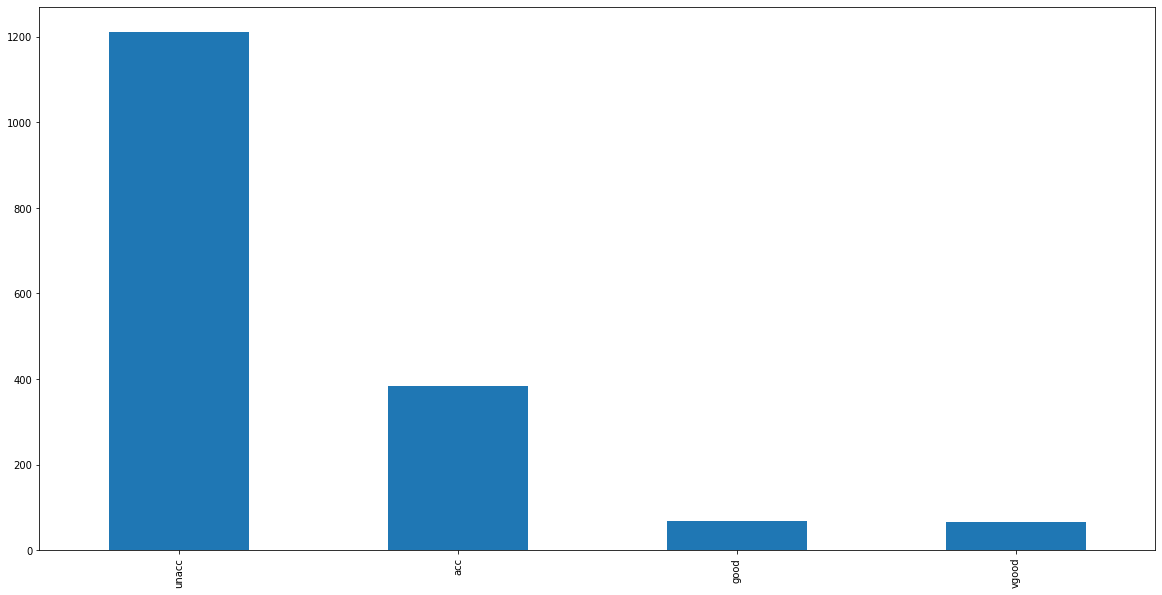

In [14]:
df['class'].value_counts().plot(kind='bar',figsize=(20,10))

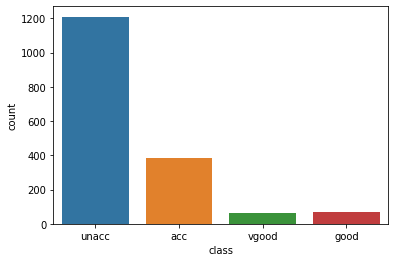

In [15]:
sns.countplot(df['class'])

In [16]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [17]:
# Data Types
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

###  Label Encoding
+ Manual fxn
+ Label_encoder
+ OneHot Encoding
+ Get Dummies

In [18]:
# Function
buying_label = { ni: n for n,ni in enumerate(set(df['buying']))}
maint_label = { ni: n for n,ni in enumerate(set(df['maint']))}
doors_label = { ni: n for n,ni in enumerate(set(df['doors']))}
persons_label = { ni: n for n,ni in enumerate(set(df['persons']))}
lug_boot_label = { ni: n for n,ni in enumerate(set(df['lug_boot']))}
safety_label = { ni: n for n,ni in enumerate(set(df['safety']))}
class_label = { ni: n for n,ni in enumerate(set(df['class']))}

In [19]:
buying_label

{'low': 0, 'high': 1, 'vhigh': 2, 'med': 3}

In [20]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [21]:
maint_label

{'low': 0, 'high': 1, 'vhigh': 2, 'med': 3}

In [22]:
print('buying_label = {}'.format(buying_label))
print('maint_label = {}'.format(maint_label))
print('doors_label = {}'.format(doors_label))
print('persons_label = {}'.format(persons_label))
print('lug_boot_label = {}'.format(lug_boot_label))
print('safety_label = {}'.format(safety_label))
print('class_label = {}'.format(class_label))

buying_label = {'low': 0, 'high': 1, 'vhigh': 2, 'med': 3}
maint_label = {'low': 0, 'high': 1, 'vhigh': 2, 'med': 3}
doors_label = {'3': 0, '5more': 1, '2': 2, '4': 3}
persons_label = {'more': 0, '2': 1, '4': 2}
lug_boot_label = {'small': 0, 'big': 1, 'med': 2}
safety_label = {'low': 0, 'med': 1, 'high': 2}
class_label = {'good': 0, 'acc': 1, 'unacc': 2, 'vgood': 3}


#### Narrative
+ From our manual encoding we can notice that the vhigh is 0 which is okay but it is better if it is number 4

In [23]:
df1 = df

In [24]:
df1.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [25]:
df1['buying'] = df1['buying'].map(buying_label)

In [26]:
df1['maint'] = df1['maint'].map(maint_label)
df1['doors'] = df1['doors'].map(doors_label)

In [27]:
df1['persons'] = df1['persons'].map(persons_label)
df1['lug_boot'] = df1['lug_boot'].map(lug_boot_label)

In [28]:
df1['safety'] = df1['safety'].map(safety_label)
df1['class'] = df1['class'].map(class_label)

In [29]:
df1.head()

buying  maint  doors  persons  lug_boot  safety  class
0       2      2      2        1         0       0      2
1       2      2      2        1         0       1      2
2       2      2      2        1         0       2      2
3       2      2      2        1         2       0      2
4       2      2      2        1         2       1      2

#### Using LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lb=LabelEncoder()

In [32]:
df2 = df

In [33]:
for i in df2.columns:
    df2[i]=lb.fit_transform(df2[i])

In [34]:
df2.head()

buying  maint  doors  persons  lug_boot  safety  class
0       2      2      2        1         0       0      2
1       2      2      2        1         0       1      2
2       2      2      2        1         0       2      2
3       2      2      2        1         2       0      2
4       2      2      2        1         2       1      2

In [35]:
df1.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

In [36]:
df2.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

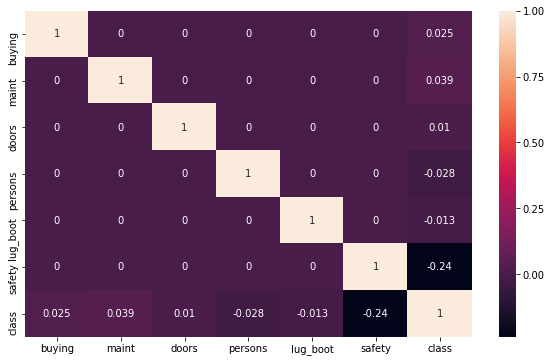

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)

In [38]:
df1.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [39]:
df1.describe()

buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     1.500000     1.000000     1.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.750000     0.750000     0.750000     0.000000     0.000000   
50%       1.500000     1.500000     1.500000     1.000000     1.000000   
75%       2.250000     2.250000     2.250000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     2.000000     2.000000   

            safety        class  
count  1728.000000  1728.000000  
mean      1.000000     1.735532  
std       0.816733     0.591455  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       1.000000     2.000000  
75%       2.000000     2.000000  
max       2.000000     3.000000

In [40]:
Xfeatures = df1[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
ylabels = df1['class']

### Split Dataset

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(Xfeatures, ylabels, test_size=0.30, random_state=7)

In [42]:
# Using - Logisitic Regression
logit = LogisticRegression()
logit.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
print("Accuracy Score:",accuracy_score(Y_test, logit.predict(X_test)))

Accuracy Score: 0.6608863198458574


In [44]:
# Using Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
print("Accuracy Score:",accuracy_score(Y_test, nb.predict(X_test)))

Accuracy Score: 0.6994219653179191


In [46]:
# Using Neural Network
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn_clf.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [47]:
print("Accuracy Score:",accuracy_score(Y_test, nn_clf.predict(X_test)))

Accuracy Score: 0.6994219653179191


In [48]:
# Save Models
import joblib

In [49]:
logit_model = open("logit_car_model.pkl","wb")
joblib.dump(logit,logit_model)
logit_model.close()

In [50]:
nb_model = open("nb_car_model.pkl","wb")
joblib.dump(nb,nb_model)
nb_model.close()

In [51]:
nn_clf_model = open("nn_clf_car_model.pkl","wb")
joblib.dump(nn_clf,nn_clf_model)
nn_clf_model.close()

#### Interpreting Models 
+ Eli5
+ lime
#### 
+ Create An Explainer(Tabular/Image/Text)
+ Data 
+ A class name[ name of targes/labels]
+ Model
+ Function that will provide the predictions.

In [52]:
# Load our pkgs
import lime
import lime.lime_tabular

In [53]:
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [54]:
print(df['class'].unique())
class_names = class_label

[2 1 3 0]


In [55]:
class_label

{'good': 0, 'acc': 1, 'unacc': 2, 'vgood': 3}

In [56]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

In [61]:
# The Explainer Instance
exp = explainer.explain_instance(X_test.iloc[10], logit.predict_proba, num_features=6, top_labels=1)

In [62]:
exp.show_in_notebook(show_table=True, show_all=False)

In [64]:
dir(exp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'as_html',
 'as_list',
 'as_map',
 'as_pyplot_figure',
 'available_labels',
 'class_names',
 'domain_mapper',
 'intercept',
 'local_exp',
 'local_pred',
 'mode',
 'predict_proba',
 'random_state',
 'save_to_file',
 'scaled_data',
 'score',
 'show_in_notebook',
 'top_labels']

In [65]:
exp.as_list()

[('1.00 < safety <= 2.00', 0.30073041690511676),
 ('persons <= 0.00', -0.020256124969027137),
 ('1.00 < doors <= 3.00', -0.014360453711123013),
 ('1.00 < maint <= 2.00', 0.006890623533305018),
 ('0.00 < buying <= 1.00', -0.0023455235363457594),
 ('0.00 < lug_boot <= 1.00', 0.002100632506847595)]

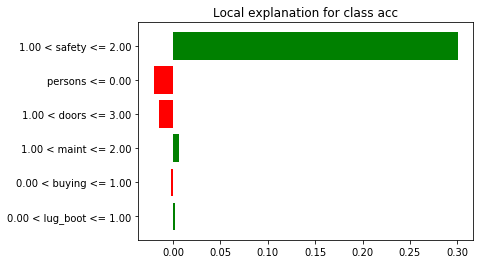

In [66]:
exp.as_pyplot_figure()
plt.show()

#### Narrative
+ Prediction Probalities : the probability for prediction either of these class.
+ The colors are very important
+ In the middle diagram it shows how much each feature contributes to the prediction of that class in weight
+ Hence safety,persons,buying which are all orange are contributing their weight to the acc[orange] in the prediction probabilities in the first
part
+ The last diagram shows each feature and their value as well as the particular class[color as orange] the belong to

In [57]:
# Verify Our Sample
X_test.iloc[10]

buying      1
maint       2
doors       2
persons     0
lug_boot    1
safety      2
Name: 458, dtype: int64

In [58]:
# Reshape To A Single Sample (1,-1)
mysample = np.array(X_test.iloc[10]).reshape(1, -1)

In [59]:
# Prediction of our sample
logit.predict(mysample)

array([1])

In [60]:
class_label

{'good': 0, 'acc': 1, 'unacc': 2, 'vgood': 3}

In [ ]:
#### Narrative
+ Hence we can see that our prediction was accurate and we know why it gave us sucha a prediction

### Using Eli5
+ pip install eli5
##### Work flow
+ Building the Explainer for Eli5
+ Provide Model
+ Feature Names
+ Class names/labels

In [67]:
import eli5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [68]:
# Showing the Weight for our model
eli5.show_weights(logit, top=10)

In [69]:
# Clearly Define Feature Names
eli5.show_weights(logit,feature_names=feature_names,target_names=class_names)

In [70]:
# Show Explaination For A Single Prediction
eli5.show_prediction(logit, X_test.iloc[10],feature_names=feature_names,target_names=class_names)

In [71]:
df.head()

buying  maint  doors  persons  lug_boot  safety  class
0       2      2      2        1         0       0      2
1       2      2      2        1         0       1      2
2       2      2      2        1         0       2      2
3       2      2      2        1         2       0      2
4       2      2      2        1         2       1      2

In [ ]:
df.to_csv("data/clean_car_eval_dataset.csv")

In [72]:
### Thanks For Reading
### Jesse E.Agbe(JCharis)
### Jesus Saves @JCharisTech
### J-Secur1ty